In [5]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
from google.colab import drive

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso, Ridge, ElasticNet, BayesianRidge, LinearRegression
from sklearn import neighbors
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.multioutput import RegressorChain
import pickle
import time

#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
drive.mount('/content/drive')
df_m = pd.read_csv('/content/drive/MyDrive/GRIP Projects/df_m.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df = pd.read_csv('/content/drive/MyDrive/GRIP Projects/Combined_Data.csv')

In [11]:
# Split the data into training and testing sets
X_num = df[['Close', 'Open', 'High', 'Low', 'Volume', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive']]
X_text = df_m['headline_text']
y = df['Close']
X_num_train, X_num_test, X_text_train, X_text_test, y_train, y_test = train_test_split(X_num, X_text, y, test_size=0.2, random_state=42)

# Normalize the numerical features
scaler = StandardScaler()
X_num_train = scaler.fit_transform(X_num_train)
X_num_test = scaler.transform(X_num_test)

# Train the numerical model
lr = LinearRegression()
lr.fit(X_num_train, y_train)
y_pred_num = lr.predict(X_num_test)

# Extract textual features
vectorizer = CountVectorizer()
X_text_train = vectorizer.fit_transform(X_text_train)
X_text_test = vectorizer.transform(X_text_test)

# Train the textual model
dt = DecisionTreeRegressor()
dt.fit(X_text_train, y_train)
y_pred_text = dt.predict(X_text_test)

# Combine the predictions using a weighted average
y_pred = 0.7 * y_pred_num + 0.3 * y_pred_text

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

RMSE: 876.9572224842826


In [12]:
# Create a DataFrame with the actual and predicted close prices
df_plot = pd.DataFrame({'real close prices': y_test, 'Predicted Close price': y_pred}, index=y_test.index)

# Sort the DataFrame by date
df_plot = df_plot.sort_index()

# Print the resulting DataFrame
print(df_plot)

      real close prices  Predicted Close price
8           4326.419922            4333.688916
12          4326.720215            4310.199121
17          4312.930176            4010.785132
23          4437.990234            4207.521167
26          4302.229980            4981.942969
...                 ...                    ...
5181       57232.058594           57538.587109
5193       56486.019531           56818.917578
5195       56816.648438           54848.378906
5201       57362.199219           57599.416016
5202       57593.488281           57651.851172

[1042 rows x 2 columns]


NameError: ignored

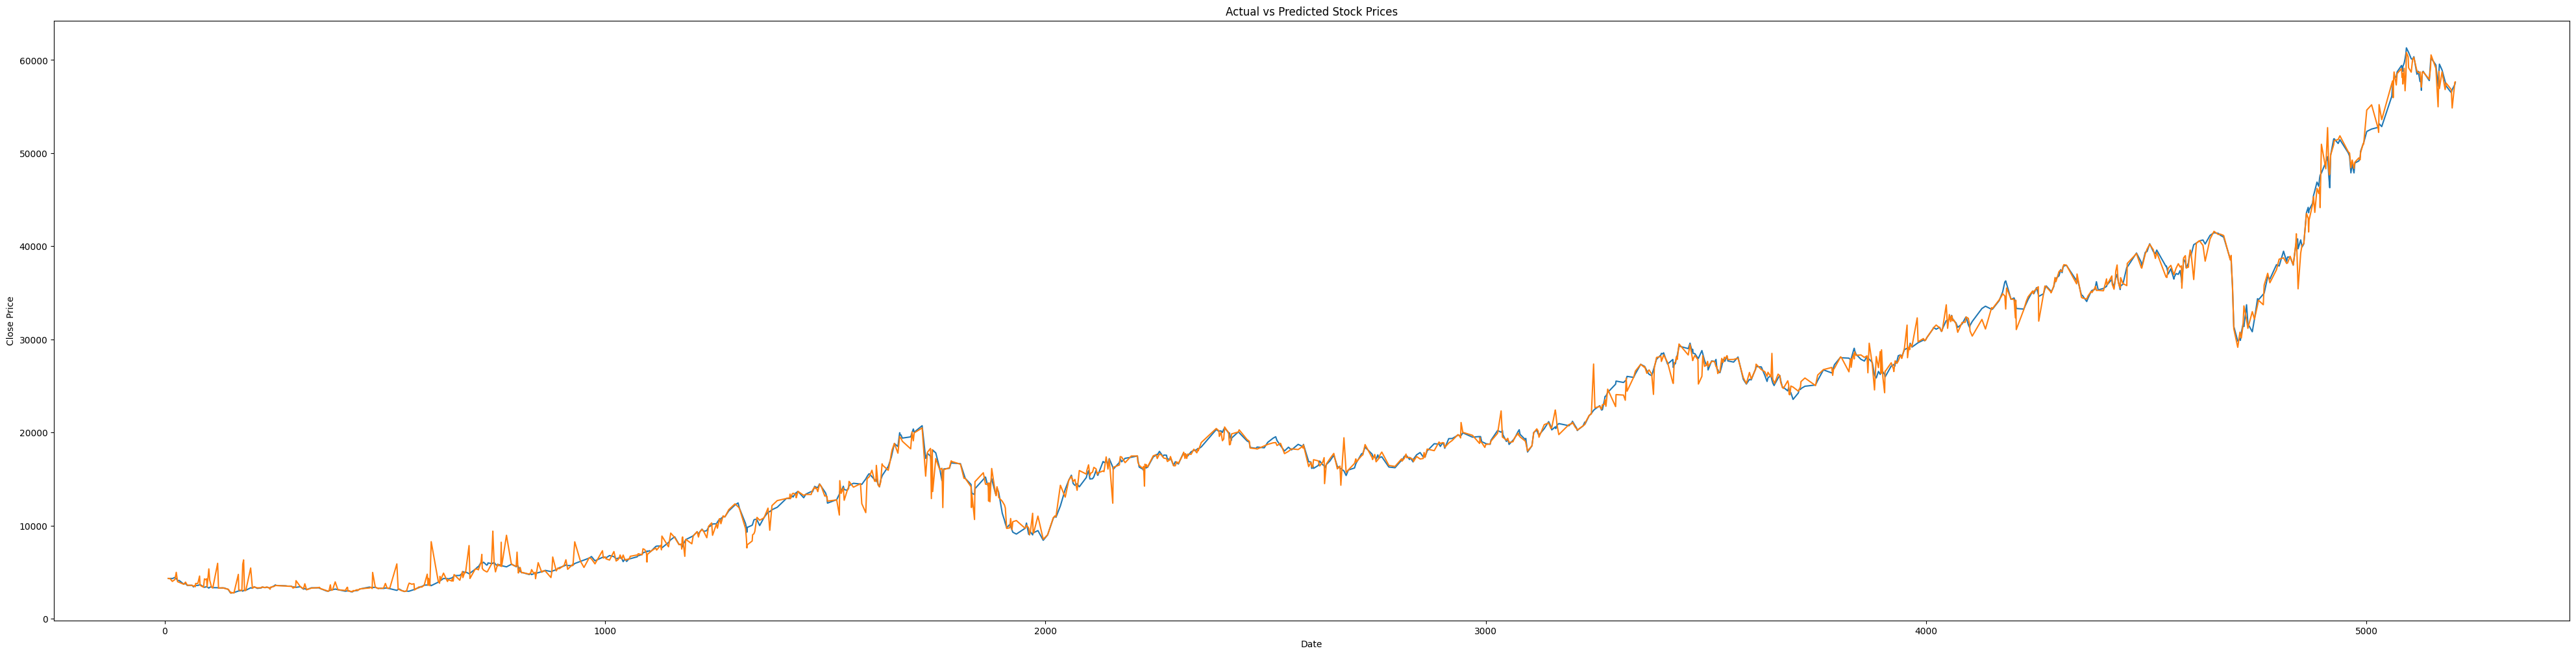

In [14]:
# Plot the actual vs predicted close prices with dates
plt.figure(figsize=(50, 12))
plt.plot(df_plot.index, df_plot['real close prices'], label='Actual')
plt.plot(df_plot.index, df_plot['Predicted Close price'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend(loc='lower right', bbox_to_anchor=(1.0, 0.0))
plt.show()